# Introduction to scikit-learn (sklearn)

This notebook demonstrates some of the most useful functions of the scikit-learn library.
What we're going to cover:


0. An end-to-end scikit learn workflow
1. Getting the data ready
2. Choosing the right estimator/algorithms for our problem.
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating the model
5. Improve the model
6. Save and load a trained model
7. Putting it all together!

## 0. An end-to-end scikit learn workflow

In [1]:
# Get the data ready
import pandas as pd
heart_disease = pd.read_csv("..\..\data\heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Create x (features matrix)
x = heart_disease.drop("target", axis=1)

# Create y (target/labels matrix)
y = heart_disease['target']

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3.Fit the model to the training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
clf.fit( x_train, y_train)

RandomForestClassifier()

In [8]:
import numpy as np

In [9]:
# make a prediction
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [10]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

In [11]:
type(y_test)

pandas.core.series.Series

In [12]:
type(y_preds)

numpy.ndarray

In [13]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [14]:
clf.score(x_test, y_test)

0.8524590163934426

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [18]:
confusion_matrix(y_test, y_preds)

array([[22,  5],
       [ 4, 30]], dtype=int64)

In [19]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [22]:
# 5. Improve the model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators..
Model accuracy on test set: 81.97%

Trying model with 20 estimators..
Model accuracy on test set: 80.33%

Trying model with 30 estimators..
Model accuracy on test set: 81.97%

Trying model with 40 estimators..
Model accuracy on test set: 85.25%

Trying model with 50 estimators..
Model accuracy on test set: 90.16%

Trying model with 60 estimators..
Model accuracy on test set: 83.61%

Trying model with 70 estimators..
Model accuracy on test set: 83.61%

Trying model with 80 estimators..
Model accuracy on test set: 88.52%

Trying model with 90 estimators..
Model accuracy on test set: 86.89%



In [23]:
# 6. Save the trained model and load it
import pickle

pickle.dump(clf, open("random-forest-model-1.pkl", "wb"))

In [24]:
loaded_model = pickle.load(open("random-forest-model-1.pkl", "rb"))

In [25]:
loaded_model

RandomForestClassifier(n_estimators=90)

In [26]:
loaded_model.score(x_test, y_test)

0.8688524590163934

In [27]:
import sklearn
sklearn.show_versions()


System:
    python: 3.9.6 (default, Jul 30 2021, 11:42:22) [MSC v.1916 64 bit (AMD64)]
executable: C:\users\shalu\desktop\project\env\python.exe
   machine: Windows-10-10.0.19042-SP0

Python dependencies:
          pip: 21.1.3
   setuptools: 52.0.0.post20210125
      sklearn: 0.24.2
        numpy: 1.20.3
        scipy: 1.6.2
       Cython: None
       pandas: 1.3.0
   matplotlib: 3.3.4
       joblib: 1.0.1
threadpoolctl: 2.2.0

Built with OpenMP: True


In [28]:
# import warnings
# warnings.filterwarnings("ignore")

In [29]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Let's listify the contents
what_we_are_covering = [
    "0. An end-to-end scikit learn workflow",
    "1. Getting the data ready",
    "2. Choosing the right estimator/algorithms for our problem",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating the model",
    "5. Improve the model",
    "6. Save and load a trained model",
    "7. Putting it all together!"
]

In [12]:
what_we_are_covering

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choosing the right estimator/algorithms for our problem',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
1. Split the data into features and label (usually `X` and `y`)
2. Filling (also called <b>imputing</b>) or disregarding missing values
3. Converting non-numerical values to numerical values (also called <b>feature encoding</b>)

In [32]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [35]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [36]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

In [39]:
car_sales = pd.read_csv("..\..\data\car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [40]:
car_sales.shape

(1000, 5)

In [41]:
len(car_sales)

1000

In [42]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [46]:
car_sales['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [44]:
# Split into x and y
x = car_sales.drop("Price", axis=1)
y = car_sales['Price']

# Split into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [45]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [47]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [48]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [50]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [51]:
x.shape

(1000, 4)

In [53]:
x['Make'].value_counts() # encoder converts it into 4 features

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [56]:
x['Colour'].value_counts() # encoder converts it into 5 features

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64

In [57]:
x['Doors'].value_counts() # encoder converts it into 3 features

4    856
5     79
3     65
Name: Doors, dtype: int64

Therefore total no. of features after encoding = 4(Make) + 5(Colour) + 3(doors) + 1(odometer) = 13

In [59]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [62]:
# Let's refit the model
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.36983344888829883

### 1.2 What if there are msising values?

1. Fill them with some value (also known as <b>imputation</b>)
2. Remove the samples with missing data altogether.

In [78]:
# Import car sales missing data
car_sales_missing = pd.read_csv("..\..\data\car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [79]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [84]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing['Price']

In [85]:
x.shape, y.shape

((1000, 4), (1000,))

In [86]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [87]:
pd.DataFrame(transformed_x)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
995,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
996,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
997,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
998,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


In [88]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### Option 1: Fill missing data with pandas

In [89]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [90]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [91]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [92]:
# remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [93]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [94]:
car_sales_missing.shape

(950, 5)

In [96]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing['Price']

In [97]:
x.shape, y.shape

((950, 4), (950,))

In [99]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                   one_hot, 
                                   categorical_features)],
                                   remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [100]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


#### Option 2: Fill missing values with scikit-learn

In [101]:
# Import car sales missing data
car_sales_missing = pd.read_csv("..\..\data\car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [102]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [103]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [104]:
# Split data into x and y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [105]:
x.shape, y.shape

((950, 4), (950,))

In [107]:
type(x)

pandas.core.frame.DataFrame

In [106]:
# Fill the missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make","Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_feature)
])

# Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [108]:
type(filled_x)

numpy.ndarray

In [113]:
pd.DataFrame(filled_x)

,0,1,2,3
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [114]:
pd.DataFrame(filled_x).isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [117]:
car_sales_filled = pd.DataFrame(filled_x,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [116]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [118]:
# Let's convert the data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()

# Define categorical features
categorical_features = ["Make","Colour","Doors"]

# Define the transformer to apply one hot encoding to categorical features
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [119]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

In [120]:
what_we_are_covering

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choosing the right estimator/algorithms for our problem',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 2. Choosing the right estimator/algorithm for our problem

Scikit-learn uses term <b>estimator</b> for machine learning model or algorithm.

* Classification
* Regression

Choosing the right estimator - https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for regression problem

In [56]:
# Import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [57]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [58]:
type(boston)

sklearn.utils.Bunch

In [59]:
# Convert the data into a dataframe
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])

In [60]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [129]:
# how many samples?
len(boston_df)

506

In [138]:
# let's try the ridge regression model
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(42)

# create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate ridge model
model = Ridge()
model.fit(x_train, y_train)

# Check the score of ridge model on test data
model.score(x_test, y_test)

0.6662221670168522

How do we improve this score?

What if Ridge wasn't working?

In [139]:
# Let's try random forest regressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate the class
model_rf = RandomForestRegressor()

# fit the model to the data
model_rf.fit(x_train, y_train)

# calculate model's score on test data
model_rf.score(x_test, y_test)

0.8654448653350507

### 2.2 Picking a machine learning model for classification problem

Let's go back to the sklearn ml map - https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [148]:
heart_disease = pd.read_csv("..\..\data\heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [149]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [150]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [151]:
len(heart_disease)

303

In [152]:
# setup random seed
np.random.seed(42)

# Create x and y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC
clf = LinearSVC()

# Fit the model to the data
clf.fit(x_train, y_train)

# Evaluate the model on test set
clf.score(x_test, y_test)

C:\users\shalu\desktop\project\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [153]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [154]:
# Let's try RandomForestClassifier and see if the score improves
# setup random seed
np.random.seed(42)

# Create x and y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(x_train, y_train)

# Evaluate the model on test set
clf.score(x_test, y_test)

0.8524590163934426

Tidbit:

    1. If you have structured data, use ensemble methods.
    2. If you have unstructured data, use deep learning aur transfer learning.

In [155]:
what_we_are_covering

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choosing the right estimator/algorithms for our problem',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 3. Fit the model/algorithm and use it to make predictions on our data

### 3.1 Fitting the model to the data

In [ ]:
# setup random seed
np.random.seed(42)

# Create x and y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()

# Fit the model to the data (training/finding patterns in training data)
clf.fit(x_train, y_train)

# Evaluate the model on test set (use the patterns modle has learned)
clf.score(x_test, y_test)

In [157]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [158]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [160]:
# Use a trained model to make predictions
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [161]:
clf.predict(x_train)

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [163]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [165]:
# Compare predictions to truth to evaluate model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [167]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [168]:
clf.score(x_test, y_test)

0.8524590163934426

Make prediction with `predict_proba()`

In [172]:
# Make predictions with predict_proba()
# predict_proba() returns probabilities of a classification label 
clf.predict_proba(x_test), clf.predict(x_test)

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82],
        [0.14, 0.86],
        [0.36, 0.64],
        [0.95, 0.05],
        [0.99, 0.01],
        [0.47, 0.53],
        [0.26, 0.74],
        [0.7 , 0.3 ],
        [0.11, 0.89],
        [0.95, 0.05],
        [0.03, 0.97],
        [0.02, 0.98],
        [0.01, 0.99],
        [0.84, 0.16],
        [0.95, 0.05],
        [0.98, 0.02],
        [0.51, 0.49],
        [0.89, 0.11],
        [0.38, 0.62],
        [0.29, 0.71],
        [0.26, 0.74],
        [0.34, 0.66],
        [0.2 , 0.8 ],
        [0.22, 0.78],
        [0.83, 0.17],
        [0.15, 0.85],
        [0.94, 0.06],
        [0.92, 0.08],
        [0.96, 0.04],
        [0.62, 0.38],
        [0.46, 0.54],
        [0.89, 0.11],
        [0.44, 0.56],
        [0.16, 0.84],
        [0.33, 0.67],
        [0.08, 0.92],
        [0.13, 0.87],
        [0.17, 0.83],
        [0.18, 0.82],
        [0.38, 0.62],
        [0.32, 0.68],
        [0

`predict()` can also be used for regression models

In [173]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [175]:
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor

# create th data x and y
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Random forest regressor class
reg = RandomForestRegressor()

# fit the regressor to training data
reg.fit(x_train, y_train)

# evaluate the model on test set
reg.score(x_test, y_test)


0.8654448653350507

In [177]:
# prediction on x_test
y_preds = reg.predict(x_test)

In [179]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [181]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [184]:
# Compare the predictions to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

In [185]:
what_we_are_covering

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choosing the right estimator/algorithms for our problem',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 4. Evaluating a trained model

Three ways to evaluate scikit-learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem specific metric functions

### 4.1 Evaluating a model with the `score` method

In [186]:
# setup random seed
np.random.seed(42)

# Create x and y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()

# Fit the model to the data (training/finding patterns in training data)
clf.fit(x_train, y_train)

# Evaluate the model on test set (use the patterns modle has learned)
clf.score(x_test, y_test)

0.8524590163934426

In [187]:
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor

# create th data x and y
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Random forest regressor class
reg = RandomForestRegressor()

# fit the regressor to training data
reg.fit(x_train, y_train)

# evaluate the model on test set
reg.score(x_test, y_test)

0.8654448653350507

In [188]:
reg.predict(x_test)

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

### 4.2 Evaluating a model using `scoring` parameter

In [191]:
from sklearn.model_selection import cross_val_score
# setup random seed
np.random.seed(42)

# Create x and y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()

# Fit the model to the data (training/finding patterns in training data)
clf.fit(x_train, y_train)

# Evaluate the model on test set (use the patterns model has learned)
clf.score(x_test, y_test)

0.8524590163934426

In [192]:
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [193]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(x_test, y_test)

# take the mean of 5-fold corss validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

Default scoring parameter of classifier = **mean accuracy**

In [194]:
# scoring parameter set to none by default
cross_val_score(clf, x, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [197]:
np.random.seed(42)
np.mean(cross_val_score(clf, x, y, scoring=None))

0.8248087431693989

Thus, using cross-validation, model is trained on 5 (cv=5) different sets of training data and evaluated on 5 different sets of test data. (Effectively, model is trained on all data and evaluated on all data).

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

**Accuracy**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
np.random.seed(42)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# create x and y
heart_disease  = pd.read_csv("../../data/heart-disease.csv")
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate the classifier
clf = RandomForestClassifier()

clf.fit(x_train, y_train)

RandomForestClassifier()

In [9]:
cross_val_score = cross_val_score(clf, x, y)

In [10]:
np.mean(cross_val_score)

0.8183606557377049

In [8]:
clf.score(x_test, y_test)

0.8524590163934426

In [17]:
print(f"Heart Disease classifier cross-validated accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease classifier cross-validated accuracy: 81.84%


**Area under Receiver Operating characteristic curve (AUC/ROC)**

1. Area under curve (AUC)
2. ROC curve

ROC curves are a comparison of a model's true positive rate (`TPR`) versus a model's false positive rate (`FPR`).

* `TP` = true positive = model predicts 1 when truth is 1
* `FP` = false positive = model predicts 1 when truth is 0
* `TN` = true negative = model predicts 0 when truth is 0
* `FN` = false negative = model predicts 0 when truth is 1

In [20]:
from sklearn.metrics import roc_curve

# make predictions with probabilities
y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

Since ROC curves only use positives (true and false) for comparison, we will use only positive class probability of y_probs

In [21]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [22]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [23]:
fpr[:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552])

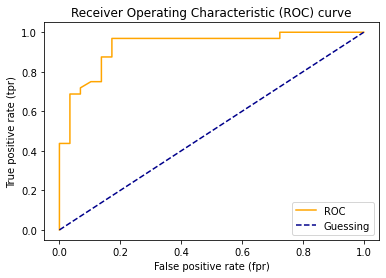

In [25]:
# Create a function for plotting ROC curve

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given false positiver rate (fpr) and
    true positive rate (tpr) of a model.
    """
    # plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive) # returns are under the curve

0.9304956896551724

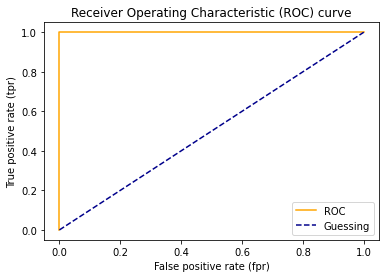

In [30]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

In [32]:
# perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a qucik way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [34]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [36]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [37]:
# Make our confusion matrix more visual using seaborn's heatmap()
import seaborn as sns

<AxesSubplot:>

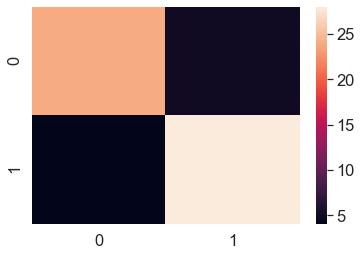

In [40]:
# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using seaborn
sns.heatmap(conf_mat)

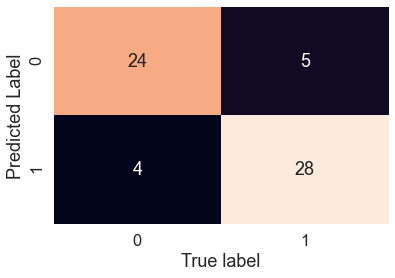

In [42]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots()
    ax = sns.heatmap(conf_mat,
                     annot = True,  # annotate the boxes with conf_mat info
                     cbar = False)  
    plt.xlabel("True label")
    plt.ylabel("Predicted Label");
    
plot_conf_mat(conf_mat)    

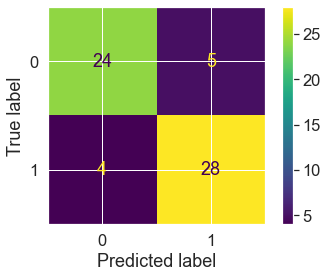

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)

**Classification Report**

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [52]:
# where precision and recall become valuable (class-imbalance situation)
disease_true = np.zeros(10000)
disease_true[0] = 1      #only one positive case

disease_preds = np.zeros(10000)  #model predicts every case as zero

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\users\shalu\desktop\project\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\users\shalu\desktop\project\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\users\shalu\desktop\project\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
    
* **Accuracy** is a good measure to start with if all classes are balanced (e.g same amount of samples which are labelled with 0 or 1).
* **Precision** and **Recall**  become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

1. `R^2` (r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Comapres your model's predictions to the mean of the targets. Values of R^2 can range from negative infinity (very poor model) to 1. For exmaple, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers, it's R^2 value would be 1.

In [77]:
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

reg = RandomForestRegressor()
reg.fit(x_train, y_train)


RandomForestRegressor()

In [78]:
reg.score(x_test, y_test)

0.8654448653350507

In [79]:
y_preds = reg.predict(x_test)

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test, y_preds)

0.8654448653350507

In [81]:
# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [82]:
y_test.mean()

21.488235294117654

In [83]:
y_test_mean[:10]

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529])

In [84]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [85]:
r2_score(y_test, y_test)

1.0

**Mean Absolute Error (MAE)**

MAE is the average of absolute differences between the predicted values and actual values.It gives you an idea of how wrong your model predictions are.

In [86]:
# mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = reg.predict(x_test)

In [88]:
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [89]:
df = pd.DataFrame(data={"Actual Values": y_test,
                        "Predicted Values": y_preds})
df

,Actual Values,Predicted Values
173,23.6,23.081
274,32.4,30.574
491,13.6,16.759
72,22.8,23.460
452,16.1,16.893
...,...,...
412,17.9,13.159
436,9.6,12.476
411,17.2,13.612
86,22.5,20.205


In [90]:
df["Differences"] = df["Predicted Values"] - df["Actual Values"]
df

,Actual Values,Predicted Values,Differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean Squared Error (MSE)**

In [93]:
# mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [94]:
# Calculate MSE by hand
squared = np.square(df["Differences"])
squared

173     0.269361
274     3.334276
491     9.979281
72      0.435600
452     0.628849
         ...    
412    22.477081
436     8.271376
411    12.873744
86      5.267025
75      5.914624
Name: Differences, Length: 102, dtype: float64

In [95]:
np.mean(squared)

9.867437068627439

### 4.2.3 Finally using the `scoring` parameter

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [103]:
# Default scoring parameter
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y)  # by default, scoring=None

In [104]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [105]:
# cross validated accuracy
print(f'Cross validated accuracy of classifier is: {np.mean(cv_acc)*100:.2f}%')

Cross validated accuracy of classifier is: 82.48%


In [112]:
# Accuracy
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, scoring='accuracy')
cv_acc
# cross validated accuracy
print(f'Cross validated accuracy of classifier is: {np.mean(cv_acc)*100:.2f}%')

Cross validated accuracy of classifier is: 82.48%


In [111]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, x, y, scoring='precision')
print(f'Cross validated accuracy of classifier (with scoring=precision) is: {np.mean(cv_precision)*100:.2f}%')

Cross validated accuracy of classifier (with scoring=precision) is: 83.30%


In [113]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, x, y, scoring='recall')
print(f'Cross validated accuracy of classifier (with scoring=recall) is: {np.mean(cv_recall)*100:.2f}%')

Cross validated accuracy of classifier (with scoring=recall) is: 85.45%


In [114]:
# f1
np.random.seed(42)
cv_f1 = cross_val_score(clf, x, y, scoring='f1')
print(f'Cross validated accuracy of classifier (with scoring=f1) is: {np.mean(cv_f1)*100:.2f}%')

Cross validated accuracy of classifier (with scoring=f1) is: 84.27%


How about regression model?

In [115]:
np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

from sklearn.ensemble import RandomForestRegressor
reg_model = RandomForestRegressor()

from sklearn.model_selection import cross_val_score

In [118]:
# Scoring set to default 'None'
cv_def = cross_val_score(reg_model, x, y, scoring=None)
print(f'Score of regressor is: {np.mean(cv_def)*100:.2f}%')

Score of regressor is: 62.65%


In [123]:
# r2
cv_r2 = cross_val_score(reg_model, x, y, scoring='r2')
print(f'R2 value of regressor is: {np.mean(cv_r2)*100:.2f}%')

R2 value of regressor is: 60.48%


In [124]:
# mae
cv_mae = cross_val_score(reg_model, x, y, scoring='neg_mean_absolute_error')
print(f'Mean absolute error of regressor is: {np.mean(cv_mae):.2f}')

Mean absolute error of regressor is: -3.01


In [125]:
cv_mae

array([-2.08480392, -2.65321782, -3.38881188, -3.74456436, -3.16724752])

In [126]:
# mse
cv_mse = cross_val_score(reg_model, x, y, scoring='neg_mean_squared_error')
print(f'Mean squared error of regressor is: {np.mean(cv_mse):.2f}')

Mean squared error of regressor is: -21.68


In [127]:
cv_mse

array([ -7.96180609, -13.56375715, -19.29982992, -47.16377434,
       -20.40673489])

### 4.3 Using different evaluation metrics as scikit-learn functions

**Classification Evaluation Functions**

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier().fit(x_train, y_train)

# Make some predictions
y_preds = clf.predict(x_test)

# Evaluate the classifier
print(f'Classification metrics on the test set:')
print(f"Accuracy : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision : {precision_score(y_test, y_preds)}")
print(f"Recall : {recall_score(y_test, y_preds)}")
print(f"F1 : {f1_score(y_test, y_preds)}")

Classification metrics on the test set:
Accuracy : 85.25%
Precision : 0.8484848484848485
Recall : 0.875
F1 : 0.8615384615384615


In [140]:
what_we_are_covering

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choosing the right estimator/algorithms for our problem',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 5. Improving a trained model

First predictions = baseline prediction
First model = baseline model

From a data perspective:
* Could we collect more data?
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

**Parameters** = model finds these patterns in data

**Hyperparameters** = settings on a model you can adjust to (potentially) improve it's ability to find patterns 

In [141]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [142]:
# finding hyperparameters of a model
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Three ways to adjust hyperparameters**:
1. By hand
2. Randomly with **RandomSearchCV**
3. Exhaustively with **GridSearchCV**

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets: Training, validation and test sets

In [143]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [151]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classfication model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"Accuracy": round(accuracy,2),
                   "Precision": round(precision,2),
                   "Recall": round(recall,2),
                   "F1-score": round(f1,2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    
    return metric_dict

In [145]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [152]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into x and y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled))  # 70% of data for training
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))  # 15% of data

x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

len(x_train), len(x_valid), len(x_test)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make baseline predictions
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1-score: 0.85


{'Accuracy': 0.82, 'Precision': 0.81, 'Recall': 0.88, 'F1-score': 0.85}

In [155]:
np.random.seed(42)

# create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=10)
clf_2.fit(x_train, y_train)

# make baseline predictions
y_preds_2 = clf_2.predict(x_valid)

# evaluate the classifier on validation set
baseline_metrics_2 = evaluate_preds(y_valid, y_preds_2)
baseline_metrics_2

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1-score: 0.84


{'Accuracy': 0.82, 'Precision': 0.84, 'Recall': 0.84, 'F1-score': 0.84}

### 5.2 Tuning hyperparameters by RandomizedSearchCV

In [158]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# split into x and y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)  

# Since RandomizedSearchCV involves cross-validation in itself, there is no need of a validation set.

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,    # no. of models to try
                            verbose=2)

# fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [159]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [160]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1-score: 0.81


### 5.3 Tuning hyperparameters by GridSearchCV

`GridSearchCV` fits the model for all different possible combinations of parameters available. (whereas `RandomizedSearchCV` has n_iter to limit the no. of models to try.)

In [161]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [164]:
# total no. of hyperparameter combinations possible = total no. of possible models
6*5*2*3*3*5

2700

In [167]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}   
# reducing possible no. of combinations
# redued the search space of hyperparameters to 60

In [168]:
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(42)


# split into x and y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)  

# Since RandomizedSearchCV involves cross-validation in itself, there is no need of a validation set.

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      verbose=2)

# fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [169]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [170]:
gs_y_preds = gs_clf.predict(x_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1-score: 0.78


{'Accuracy': 0.79, 'Precision': 0.74, 'Recall': 0.82, 'F1-score': 0.78}

Let's compare our different model metrics.

In [171]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": baseline_metrics_2,
                                "Random search": rs_metrics,
                                "Grid search": gs_metrics})

In [172]:
compare_metrics

,baseline,clf_2,Random search,Grid search
Accuracy,0.82,0.82,0.82,0.79
Precision,0.81,0.84,0.77,0.74
Recall,0.88,0.84,0.86,0.82
F1-score,0.85,0.84,0.81,0.78


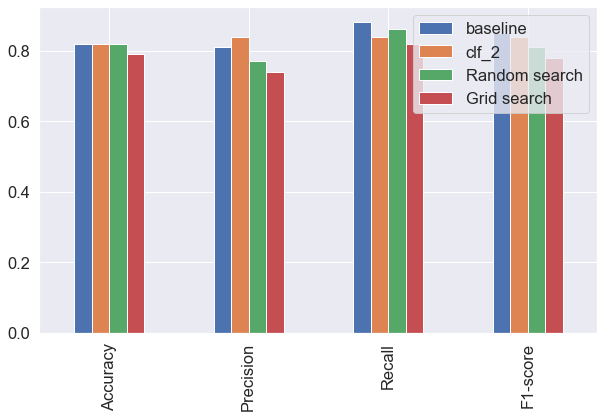

In [179]:
compare_metrics.plot.bar(figsize =(10,6));

In [180]:
what_we_are_covering

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choosing the right estimator/algorithms for our problem',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 6. Save and load a trained model

Two ways to save and load machine learning models:
1. With python's `pickle` module
2. With the `joblib` module

**Pickle**

In [183]:
import pickle 

# save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [184]:
#load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [185]:
loaded_pickle_model

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [187]:
# make some predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)

pickle_metrics = evaluate_preds(y_test, pickle_y_preds)
pickle_metrics

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1-score: 0.78


{'Accuracy': 0.79, 'Precision': 0.74, 'Recall': 0.82, 'F1-score': 0.78}

In [188]:
gs_metrics

{'Accuracy': 0.79, 'Precision': 0.74, 'Recall': 0.82, 'F1-score': 0.78}

**Joblib**

In [190]:
from joblib import dump, load

#save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [193]:
loaded_joblib_model = load("gs_random_forest_model_1.joblib")
loaded_joblib_model

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [195]:
joblib_y_preds = loaded_joblib_model.predict(x_test)

joblib_metrics = evaluate_preds(y_test, joblib_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1-score: 0.78


In [196]:
what_we_are_covering

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choosing the right estimator/algorithms for our problem',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 7. Putting it all together!

In [197]:
# load the data
data = pd.read_csv("../../data/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [198]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [199]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [3]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed 
import numpy as np
np.random.seed(42)

# import data and drop the rows with missing labels
data = pd.read_csv("../../data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transfomer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transfomer, door_feature),
                        ("num", numeric_transformer, numeric_feature)])

# creating a preprocessing and modeling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
x = data.drop("Price", axis=1)
y = data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`.

In [5]:
# Use gridSreachCV with our regression pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"], # '--' is used for going one level up
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, verbose=2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                            

In [6]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'auto',
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}

In [8]:
gs_model.score(x_test, y_test)

0.3339554263158365

In [13]:
what_we_are_covering

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choosing the right estimator/algorithms for our problem',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. Save and load a trained model',
 '7. Putting it all together!']